In [ ]:
%%capture
!pip install ibm-watsonx-ai=="0.2.6"
!pip install langchain=="0.1.16"
!pip install langchain-ibm=="0.1.4"
!pip install langchain-experimental=="0.0.57"
!pip install matplotlib=="3.8.4"
!pip install seaborn=="0.13.2"

In [ ]:
# We use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams
from ibm_watson_machine_learning.foundation_models.extensions.langchain import WatsonxLLM

from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZNoKMJ9rssJn-QbJ49kOzA/student-mat.csv"
)

In [ ]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Create a dictionary to store credential information
credentials = {
    "url"    : "https://us-south.ml.cloud.ibm.com"
}

In [ ]:
# Indicate the model we would like to initialize. In this case, Llama 3 70B.
model_id    = 'meta-llama/llama-3-70b-instruct'

In [ ]:
# Initialize some watsonx.ai model parameters
params = {
        GenParams.MAX_NEW_TOKENS: 256, # The maximum number of tokens that the model can generate in a single run.
        GenParams.TEMPERATURE: 0,   # A parameter that controls the randomness of the token generation. A lower value makes the generation more deterministic, while a higher value introduces more randomness.
    }
project_id  = "skills-network" # <--- NOTE: specify "skills-network" as your project_id
space_id    = None
verify      = False

In [ ]:
# Launch a watsonx.ai model
model = Model(
    model_id=model_id,
    credentials=credentials,
    params=params,
    project_id=project_id,
    space_id=space_id,
    verify=verify
)

WMLClientError: '`apikey` for IAM token is not provided in credentials for the client'

In [ ]:
# Integrate the watsonx.ai model with the langchain framework
llm = WatsonxLLM(model = model)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=False,
    return_intermediate_steps=True  # set return_intermediate_steps=True so that model could return code that it comes up with to generate the chart
)

In [ ]:
respomse = agent.invoke("Generate python code for: Here's a prompt summarizing the Space Invaders reinforcement learning project:Project: Deep Q-Learning Agent for Space InvadersDevelop a reinforcement learning agent using Deep Q-Learning to play the Atari game Space Invaders. The project involves:Environment setup:Use OpenAI Gym to create the Space Invaders environmentImplement frame preprocessing (grayscale, resize, normalize)Deep Q-Network (DQN) implementation:Design a convolutional neural network model using TensorFlow/KerasCreate a DQN agent with experience replay and target networkTraining process:Implement epsilon-greedy exploration strategyTrain the agent for a specified number of episodesPeriodically save the model weightsVisualization and evaluation:Display the gameplay of both untrained and trained agents using OpenCvCompare and analyze the performance before and after trainingPerformance metrics:Track and display total rewards per episodecImplement functions to calculate and visualize performance statistics The goal is to demonstrate how the agent's performance improves through reinforcement learning, from random actions to strategic gameplay in Space Invaders.")

In [ ]:
response = agent.invoke("how many rows of data are in this file?")

In [ ]:
response['output']

'395'

In [ ]:
len(df)

395

In [ ]:
response['intermediate_steps'][0][0].tool_input.replace('; ', '\n')

'len(df)'

In [ ]:
response = agent.invoke("Give me all the data where student's age is over 18 years old.")

In [ ]:
print(response)

{'input': "Give me all the data where student's age is over 18 years old.", 'output': 'The final answer is the dataframe with the students who are over 18 years old.', 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="df[df['age'] > 18]", log="Thought: I need to filter the dataframe to get the rows where the age is greater than 18.\nAction: python_repl_ast\nAction Input: df[df['age'] > 18]"),     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
127     GP   F   19       U     GT3       T     0     1   at_home     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
210     GP   F   19       U     GT3       T     3     3     other     other   
247     GP   M   22       U     GT3       T     3     1  services  services   
257     GP   M   19       U     LE3       A     4     3  services   at_home   
270     GP   F   19       U     GT3       T     3     3     other  services   
296     GP   F   19       U  

In [ ]:
response['intermediate_steps'][0][0].tool_input.replace('; ', '\n')

"df[df['age'] > 18]"

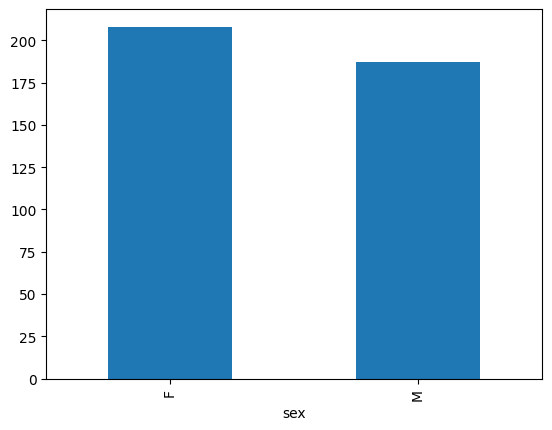

In [ ]:
response = agent.invoke("Plot the gender count with bars.")

In [ ]:
print(response)

{'input': 'Plot the gender count with bars.', 'output': 'The final answer is the bar chart showing the count of males and females.', 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="df['sex'].value_counts().plot(kind='bar')", log="Thought: I need to count the number of males and females in the 'sex' column and then plot a bar chart.\nAction: python_repl_ast\nAction Input: df['sex'].value_counts().plot(kind='bar')"), <Axes: xlabel='sex'>)]}


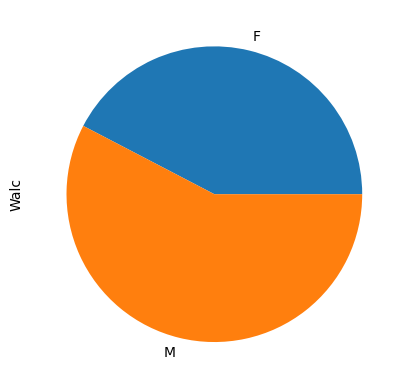

In [ ]:
response = agent.invoke("Generate a pie chart to display average value of Walc for each Gender.")

In [ ]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
df.groupby('sex')['Walc'].mean().plot(kind='pie')
plt.show()


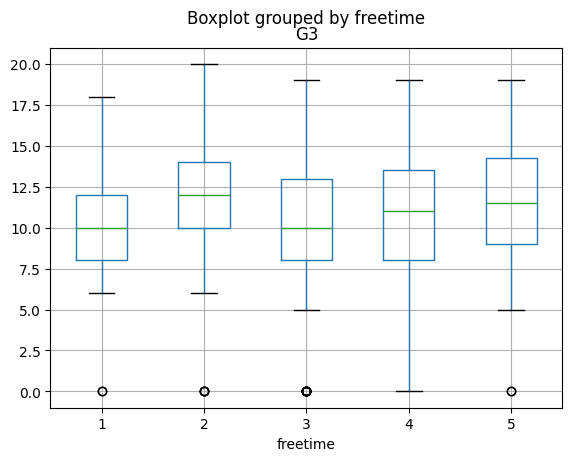

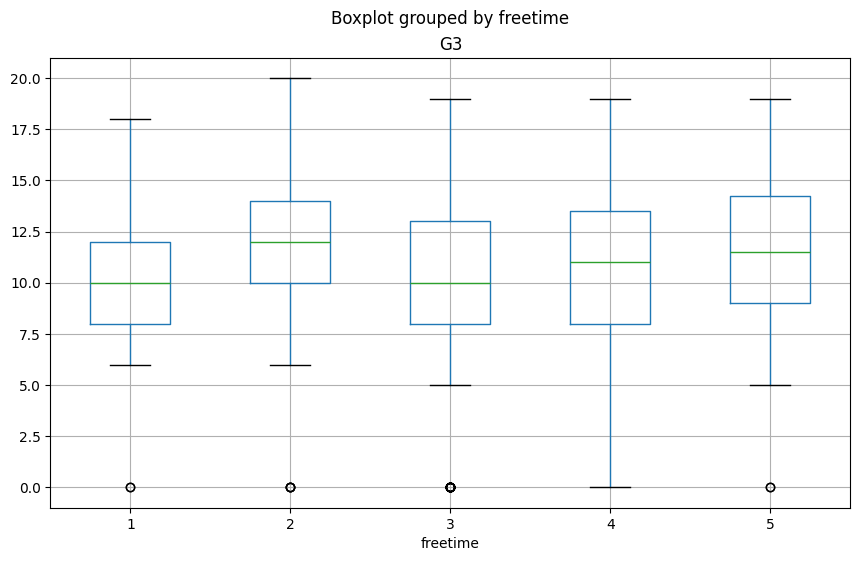

In [ ]:
response = agent.invoke("Create box plots to analyze the relationship between 'freetime' (amount of free time) and 'G3' (final grade) across different levels of free time.")

In [ ]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
df.boxplot(column='G3', by='freetime')
plt.show()


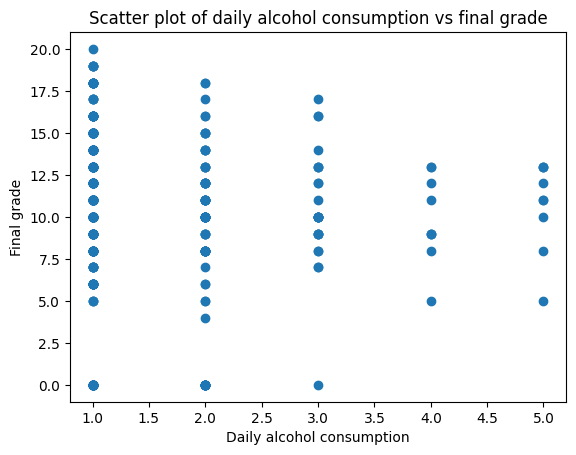

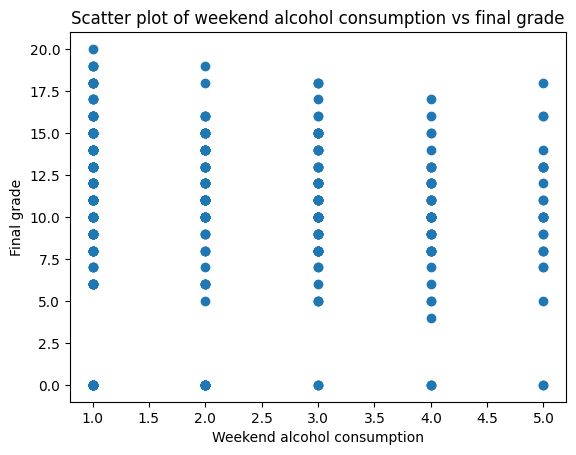

In [ ]:
response = agent.invoke("Generate scatter plots to examine the correlation between 'Dalc' (daily alcohol consumption) and 'G3', and between 'Walc' (weekend alcohol consumption) and 'G3'.")

In [ ]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
plt.scatter(df['Dalc'], df['G3'])
plt.xlabel('Daily alcohol consumption')
plt.ylabel('Final grade')
plt.title('Scatter plot of daily alcohol consumption vs final grade')
plt.show()
plt.scatter(df['Walc'], df['G3'])
plt.xlabel('Weekend alcohol consumption')
plt.ylabel('Final grade')
plt.title('Scatter plot of weekend alcohol consumption vs final grade')
plt.show()


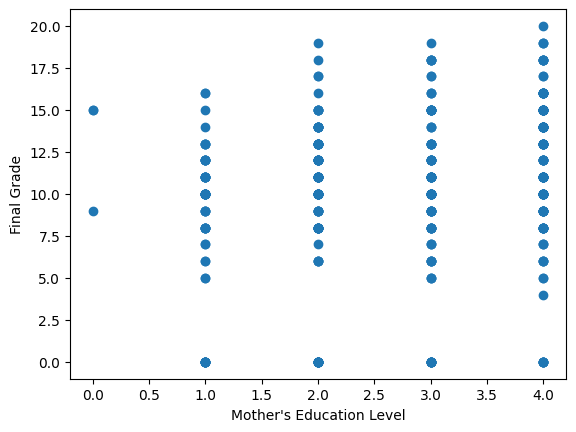

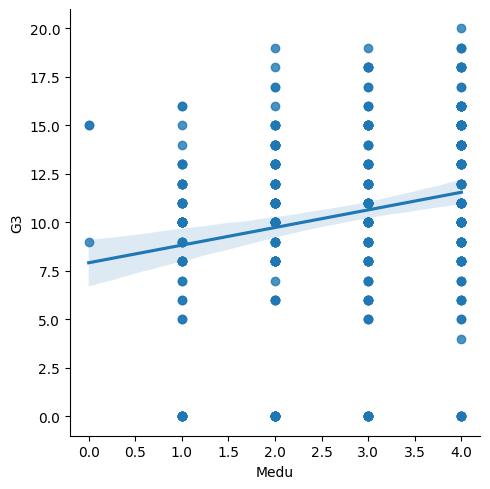

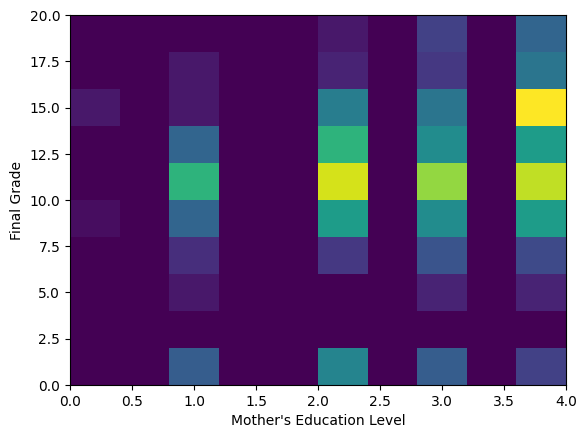

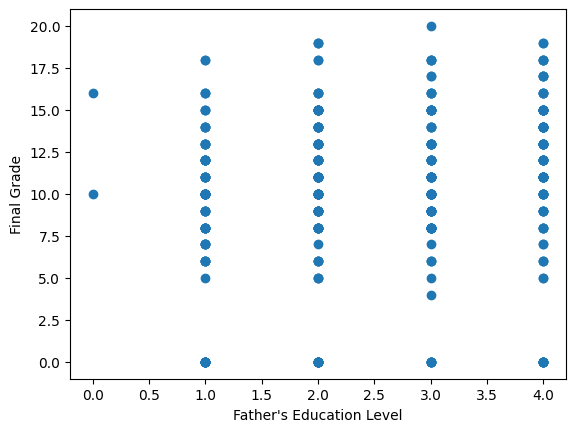

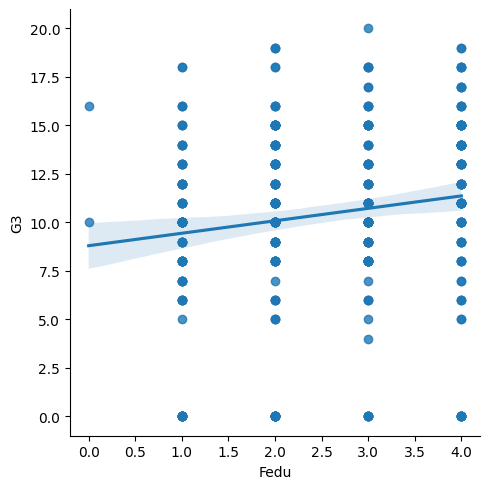

In [ ]:
# your code here
response = agent.invoke("Visualise, using all possible visualisations, the relationshio between 'Medu' mother's education level) and 'G3' (final grade), and between 'Fedu' (father's education level) and 'G3'.")

In [ ]:
print(response)

In [ ]:
# your code here
response = agent.invoke("Visualise(using all possible visualisations) in the best way possible and the most logical way possible the comparison of average final grades ('G3') of students with internet access at home versus those without ('internet' column).")

In [ ]:
print(response)

In [ ]:
# the code that model use here
response = agent.invoke("response = agent.invoke("Plot a scatter plot showing the correlation between the number of absences ('absences') and final grades ('G3') of students.")

for i in range(len(response['intermediate_steps'])):
    print(response['intermediate_steps'][i][0].tool_input.replace(';', '\n'))")

In [ ]:
print(response)